In [8]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import analysis_utils as aua

In [9]:
sample = pd.read_csv('../../data/backup_imu_data.csv')
sample

,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z
0,15322722,-0.310575,0.075998,10.065256,0.028100,-0.042455,-0.007941
1,15323934,-0.397344,0.076596,10.273503,0.028100,-0.042455,-0.007941
2,15325017,-0.678597,0.201066,9.964125,0.028100,-0.042455,-0.007941
3,15325997,-0.478728,0.101730,10.066453,0.028100,-0.042455,-0.007941
4,15327015,-0.266891,0.037700,10.067650,0.028100,-0.042455,-0.007941
...,...,...,...,...,...,...,...
4091,19829563,-0.270481,-0.212436,10.092185,0.073609,0.008552,0.017104
4092,19830534,-0.152595,-0.227396,10.122106,0.073609,0.008552,0.017104
4093,19831505,-0.158579,-0.166956,10.089791,0.073609,0.008552,0.017104
4094,19832510,-0.208845,-0.222010,10.083807,0.073609,0.008552,0.017104


In [14]:
sample_1024 = sample

In [15]:
# sample_1024 = pd.read_csv('../../data/sample_1024.csv')
# sample_1024 = pd.read_csv('../data/lp_sample_1024.csv')
# sample_1024

In [16]:
# berechnen den zeitabstand zwischen anfang und ende des samples
sample_time_delta = sample_1024['time_micros'].iloc[-1] - sample_1024['time_micros'].iloc[0]

sample_1024['time_micros'].iloc[0], sample_1024['time_micros'].iloc[-1], sample_time_delta

(np.int64(15322722), np.int64(19833756), np.int64(4511034))

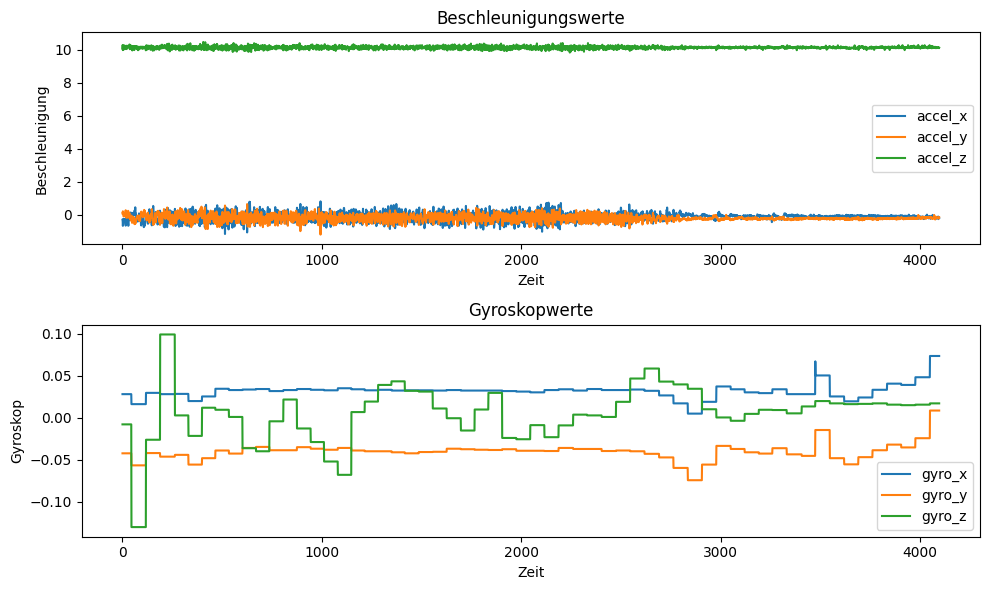

In [17]:
# Plotten der Daten
plt.figure(figsize=(10, 6))

# Plotten der Beschleunigungswerte
plt.subplot(2, 1, 1)
plt.plot(sample_1024[['accel_x', 'accel_y', 'accel_z']], label=['accel_x', 'accel_y', 'accel_z'])
plt.xlabel('Zeit')
plt.ylabel('Beschleunigung')
plt.title('Beschleunigungswerte')
plt.legend()

# Plotten der Gyroskopwerte
plt.subplot(2, 1, 2)
plt.plot(sample_1024[['gyro_x', 'gyro_y', 'gyro_z']], label=['gyro_x', 'gyro_y', 'gyro_z'])
plt.xlabel('Zeit')
plt.ylabel('Gyroskop')
plt.title('Gyroskopwerte')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# fft für gyrowerte errechnen

gyro_columns = [
    sample_1024['gyro_x'],
    sample_1024['gyro_y'],
    sample_1024['gyro_z'],
]

# fourier_data = []
# for col in gyro_columns:
#     result = aua.get_fourier(col)
#     x_frequencies.append(result)
# in kurz:
gyro_fourier_data = [aua.get_fourier(col, sample_time_delta) for col in gyro_columns]
gyro_fourier_data
len(gyro_fourier_data)

3

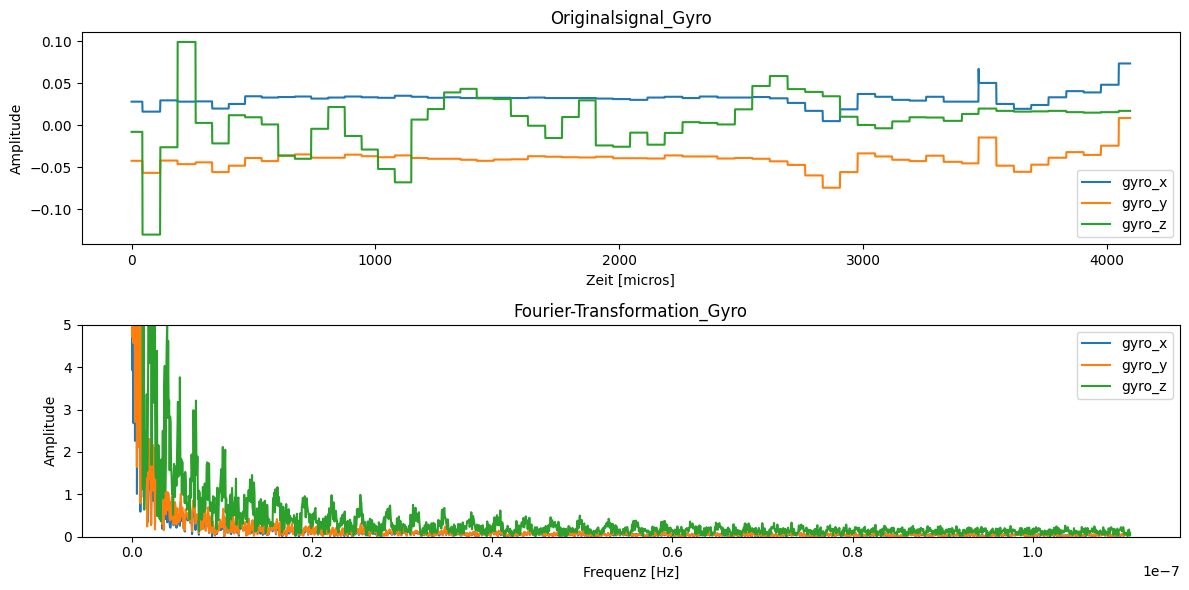

In [19]:
# Plotten des Originalsignals für gyrowerte
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
for signal in gyro_columns:
    # plt.scatter(sample_1024['time_micros'], signal, s=1)
    plt.plot(signal)
plt.title('Originalsignal_Gyro')
plt.xlabel('Zeit [micros]')
plt.ylabel('Amplitude')
plt.legend(['gyro_x', 'gyro_y', 'gyro_z'])


# Plotten der Fourier-Transformation (Amplitude)
plt.subplot(2, 1, 2)
for x_freq, y_fourier in gyro_fourier_data:
    # abs -> betrag
    # plt.scatter(x_freq, np.abs(y_fourier), s=1)
    plt.plot(x_freq, np.abs(y_fourier))
plt.title('Fourier-Transformation_Gyro')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
# plt.xlim(0, .0000006)  # Fokus auf den interessanten Frequenzbereich
plt.ylim(0, 5)  # Fokus auf den interessanten Frequenzbereich

# plt.xscale('log')
# plt.yscale('log')

plt.legend(['gyro_x', 'gyro_y', 'gyro_z'])



plt.tight_layout()
plt.show()

In [20]:
# fft für accelwerte errechnen

accel_columns = [
    sample_1024['accel_x'],
    sample_1024['accel_y'],
    sample_1024['accel_z'],
]

accel_fourier_data = [aua.get_fourier(col, sample_time_delta) for col in accel_columns]
accel_fourier_data

[(array([0.00000000e+00, 5.41207681e-11, 1.08241536e-10, ...,
         1.10676971e-07, 1.10731092e-07, 1.10785212e-07]),
  array([-573.4000591  +0.j        ,    1.16640074+60.34519287j,
          -51.77072751 +0.5622021j , ...,   -4.96112678 +3.69614351j,
           10.44255795 -2.71183301j,   -8.2111103  -0.75314424j])),
 (array([0.00000000e+00, 5.41207681e-11, 1.08241536e-10, ...,
         1.10676971e-07, 1.10731092e-07, 1.10785212e-07]),
  array([-852.34529338+0.00000000e+00j,    1.84801087-5.87186330e+01j,
           51.2342925 -3.25276666e+00j, ...,    7.59367074+9.61619834e-01j,
           -8.00145166+6.17647245e+00j,    6.93774816-4.89107569e-02j])),
 (array([0.00000000e+00, 5.41207681e-11, 1.08241536e-10, ...,
         1.10676971e-07, 1.10731092e-07, 1.10785212e-07]),
  array([ 4.14537234e+04+0.j        ,  6.34895715e+00-2.14850582j,
         -1.02779515e+00+3.41160861j, ...,  2.79351111e+00+0.06146507j,
         -3.67160488e-01-3.53950452j, -6.72424370e-01-0.19192515j]))]

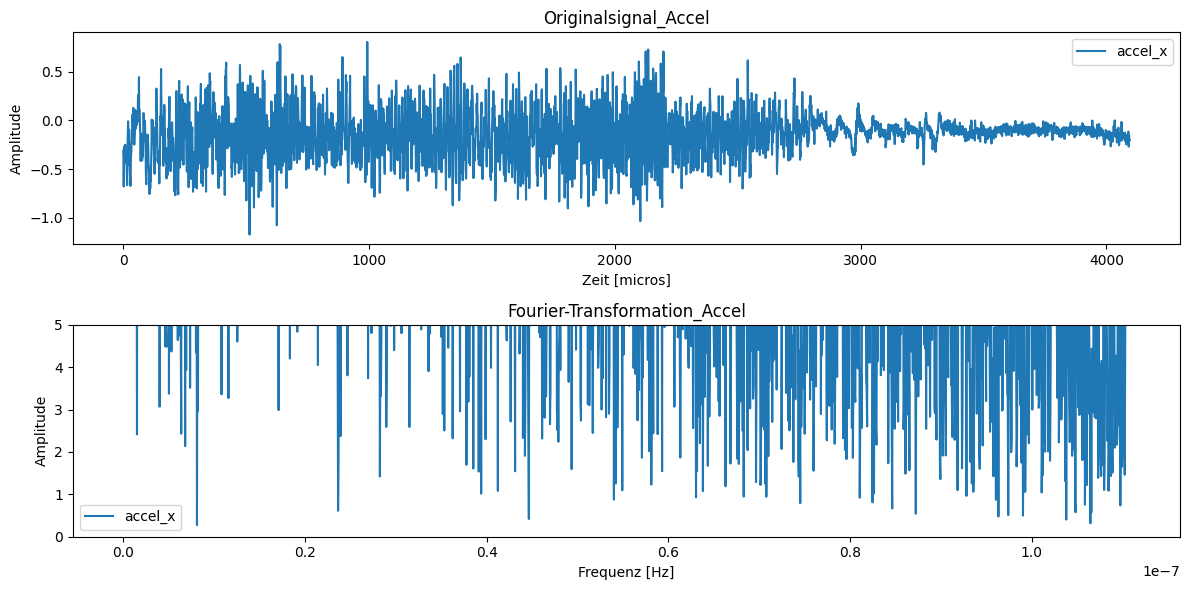

In [21]:
# Plotten des Originalsignals für gyrowerte
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
for signal in accel_columns[:1]:
    # plt.scatter(sample_1024['time_micros'], signal, s=1)
    plt.plot(signal)
plt.title('Originalsignal_Accel')
plt.xlabel('Zeit [micros]')
plt.ylabel('Amplitude')
plt.legend(['accel_x', 'accel_y', 'accel_z'])


# Plotten der Fourier-Transformation (Amplitude)
plt.subplot(2, 1, 2)
for x_freq, y_fourier in accel_fourier_data[:1]:
    # abs -> betrag
    # plt.scatter(x_freq, np.abs(y_fourier), s=1)
    plt.plot(x_freq, np.abs(y_fourier))
plt.title('Fourier-Transformation_Accel')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
# plt.xlim(0, .0000006)  # Fokus auf den interessanten Frequenzbereich
plt.ylim(0, 5)  # Fokus auf den interessanten Frequenzbereich

# plt.xscale('log')
# plt.yscale('log')

plt.legend(['accel_x', 'accel_y', 'accel_z'])



plt.tight_layout()
plt.show()

**niedrige Frequenz in Hertz (1/Periode pro Sekunde)**
- große/lange Periode (wenig Schwingungen pro Sekunde)
- tiefer Ton

**hohe Frequenz in Hertz (1/Periode pro Sekunde)**
- kleine/kurze Periode (viele Schwingungen pro Sekunde)
- hoher Ton